以下介紹PCA的理論

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_1 = (1,4)
x_2 = (4,1)
x_3 = np.sum([x_1,x_2],axis=0)

以前在國高中學向量時，看過向量長成：

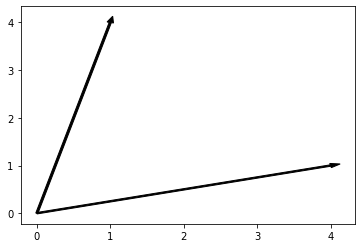

In [3]:
ax = plt.axes()
ax.arrow(0, 0, *x_1,width = 0.03, color = 'black')
ax.arrow(0, 0, *x_2,width = 0.03,color = 'black')
plt.show()

如果我們把這兩個向量相加，則會產生:

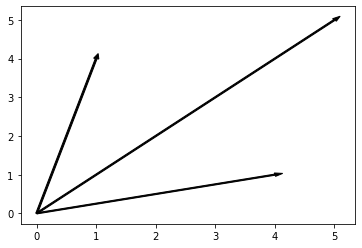

In [4]:
ax = plt.axes()
ax.arrow(0, 0, *x_1,width = 0.03, color = 'black')
ax.arrow(0, 0, *x_2,width = 0.03,color = 'black')
ax.arrow(0, 0, *x_3,width = 0.03,color = 'black')
plt.show()

In [5]:
x1 = [x_1[0],x_3[0]]
y1 = [x_1[1],x_3[1]]
x2 = [x_2[0],x_3[0]]
y2 = [x_2[1],x_3[1]]

我們可以發現兩個向量可以透過相加的方式張開成一個平行四邊形

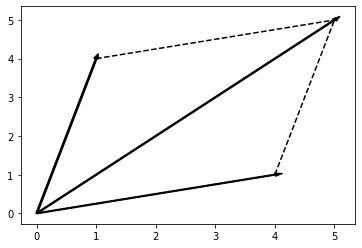

In [6]:
ax = plt.axes()
ax.arrow(0, 0, *x_1,width = 0.03, color = 'black')
ax.arrow(0, 0, *x_2,width = 0.03,color = 'black')
ax.arrow(0, 0, *x_3,width = 0.03,color = 'black')
ax.plot(x1, y1, 'black', linestyle='--', marker='')
ax.plot(x2, y2, 'black', linestyle='--', marker='')

plt.show()

# 我們可以想像：若把兩個向量之間進行線性組合，可以張開一個平面

定義名詞：$\textbf{基底}$<br>
基底為 「張開平面所需之線性獨立向量」

回顧上週的簡報，提到了乾淨跟簡潔的說法，以下介紹所謂的乾淨:

一直以來我們在數學課畫座標的時候，都是長成下面的情況:

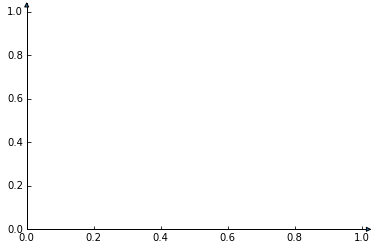

In [7]:
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

plt.show()

這是隱含了我們用(1,0)跟(0,1)當成張開平面的向量<BR>
我們可以觀察到：這兩個向量$\textbf{彼此垂直}$

這樣的彼此互相垂直的基底稱為: $\textbf{正交基底}$

用上圖平行四邊形的向量，跟這邊的向量來說明的話，我們有兩個例子:<br>
1. 平行四邊形例子：基底為 $x_1 = (1,4)$, $x_2 = (4,1)$<br>
2. 直角坐標：基底為 $x_3 = (1,0)$, $x_4 = (0,1)$

# 問題：如何分別用兩個情況之基底來描述二維的點?

舉例而言：如何描述 $(12,34)$ ?

用基底$x_1,x_2$的話，我們要解方程：<br>
$(12,34) = ax_1 + bx_2 = a(1,4) + b(4,1)$ $\Rightarrow$ $a = \frac{124}{15}, b=\frac{14}{15}$

但如果我們用基底$x_3,x_4$的話，可以很輕易地看出：<br>
$(12,34) = cx_3 + dx_4 = c(1,0) + d(0,1)$ $\Rightarrow$ $c = 12, d=34$

# 若用乾淨的表達方式，可以幫助我們更容易將資料做描述

下面提到「簡潔的描述方式的例子」

如果我們看這個情況:

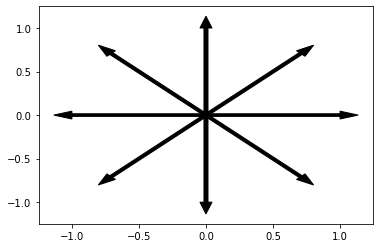

In [8]:
ax = plt.axes()
ax.arrow(0, 0,1,0,width = 0.03, color = 'black')
ax.arrow(0, 0,np.sqrt(1/2),np.sqrt(1/2),width = 0.03, color = 'black')
ax.arrow(0, 0,0,1,width = 0.03,color = 'black')
ax.arrow(0, 0,-np.sqrt(1/2),np.sqrt(1/2),width = 0.03, color = 'black')
ax.arrow(0, 0,-1,0,width = 0.03,color = 'black')
ax.arrow(0, 0,-np.sqrt(1/2),-np.sqrt(1/2),width = 0.03, color = 'black')
ax.arrow(0, 0,0,-1,width = 0.03,color = 'black')
ax.arrow(0, 0,np.sqrt(1/2),-np.sqrt(1/2),width = 0.03, color = 'black')
plt.show()

用這些向量可以張開二維平面，但是感覺就很累贅

# 我們可以用很多向量來張開平面，但是如果能用盡量少的向量辦到一樣的事情，則較少的那一邊稱為「比較簡潔」

有了基底當作描述方式的概念後，我們討論如何「該用什麼樣的描述方式可以達到乾淨又簡潔?」<br>
以下介紹$\textbf{特徵值}$與$\textbf{特徵向量}$

## 特徵值 和 特徵向量
一個方陣 $M$ 的**特徵向量** 為一個非零向量滿足：經過$M$的線性變換後，仍舊與自己共線。精確的數學定義如下：

$M \cdot v = \lambda \times v$

其中 $\lambda$ 是一個數值，稱為**特徵值**

我們的目標：**找出特徵向量當作新的描述方式**

有了新的描述方式後，我們討論「如何將原先的描述方式轉換成新的描述方式」

我們透過**投影**的方式進行

註記：投影(長)為兩向量之內積之倍數

# SVD

根據SVD理論，我們可以將$X$ 分解成：

$X = U\Sigma V^T$

其中 $U$ 是 $m\times m$ 矩陣，並且由$\mathcal{R}^m$ 的orthonormal basis組成 <br>
$\Sigma$ 為 特徵值組成之對角矩陣<br>
$V$ 為$m\times m$ 矩陣，並且由$\mathcal{R}^n$ 的orthonormal basis組成

仔細來說，

$U = \begin{bmatrix}
u_1 & u_2 & \cdots & u_m 
\end{bmatrix}$

$
\Sigma = \begin{bmatrix}
\sqrt{\lambda_1} & 0 & 0 & \cdots & 0 \\
0 & \sqrt{\lambda_2}& 0 & \cdots & 0\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
0 & 0 &\sqrt{\lambda_r} & \cdots & 0\\
0& 0& 0& 0& 0
\end{bmatrix}
$

$V = \begin{bmatrix}
v_1 & v_2 & \cdots & v_n 
\end{bmatrix}$

$\{u_1,...,u_m\}$ 是 $\mathcal{R}^m$的orthonormal basis<br>
$\{\lambda_1,...,\lambda_r\}$ 是$X^TX$的eigenvalue, $r = rank(X^TX)$<br>
若$r\leq n$，則 $\lambda_i=0$ for $i>r$<br>
$\{v_1,...,v_n\}$ 既是$\mathcal{R}^n$的orthonormal basis，也是$X^TX$的eigenvector

# PCA

條件：

$X : m\times n$ 矩陣<br>
目標：將$X$ 投影到低維度空間並且讓資訊損失最小<br>
數學上解釋：保留最多解釋變異<br>

回顧：一個向量$x$ 在 $w$上之投影$z$(或稱將向量$x$ 投影到 $w$上) 為：

$z = w^Tx$

In [9]:
np.random.seed(42)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3)) #給出60個3維點

X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2 #x座標

X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2 #y座標

X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m) #z座標

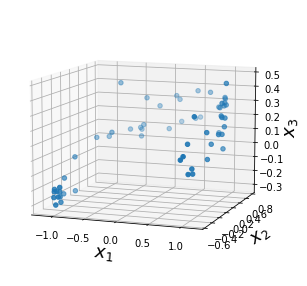

In [10]:
axes = [-1, 1, -1, 1, -0.5, 0.5]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
plt.show()

# 第一步：找出主成分(Principal Components)

透過SVD 我們可以將$X$ 分解成：

$X = U\Sigma V^T$

其中 $U$ 是 $m\times m$ 矩陣，並且由$\mathcal{R}^m$ 的orthonormal basis組成 <br>
$\Sigma$ 為 $X^TX$之特徵值組成之對角矩陣<br>
註：我們可以觀察出$X^TX$就是 $X$ 的共變異數矩陣。<br>
$V$ 為$n\times n$ 矩陣，並且由$\mathcal{R}^n$ 的orthonormal basis組成 <br>
而對應$\Sigma$之特徵向量即稱為「**主成分**」

第一種方法：自己手刻程式

In [11]:
X_centered = X - X.mean(axis=0) #將資料置中
U, s, Vt = np.linalg.svd(X_centered) #使用numpy 的套件計算SVD

#注意：
#1.這邊的Vt已經是V^T
#2. s 的形狀是1D array，此例當中為array([7.05108078, 2.81608982, 0.7518544 ])

手動檢查分解出來的矩陣是不是真的能變回去原本的矩陣

In [12]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s) #因為要進行矩陣乘法，故把s造成原先應該要有的對角矩陣長相

In [13]:
np.allclose(X_centered, U.dot(S).dot(Vt)) 
#np.allclose(a,b)會element-wise檢查 abs(a-b) <= atol + rtol * abs(b)
#而atol 預設為1e-08
#rtol 預設為1e-05

True

# 第二步：決定留下多少主成分

這邊有兩種方法決定要留多少主成分：<br>
1. 畫出主成分的變異累積圖<br>

2. 直接給定要保留至少多少比例的變異<br>

In [14]:
cumsum = np.cumsum(s)

In [15]:
cumsum

array([ 7.05108078,  9.86717061, 10.619025  ])

In [16]:
ratio = np.square(s) / np.square(s).sum()

In [17]:
ratio

array([0.85406025, 0.13622918, 0.00971057])

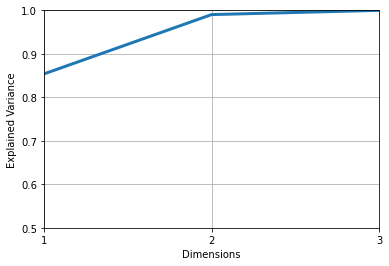

In [18]:
plt.figure(figsize=(6,4))
plt.plot([1,2,3],ratio.cumsum(), linewidth=3)
plt.axis([1, 3, 0.5, 1])
plt.xticks(range(1,4))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

因為這是簡單的例子，所以解釋變異的轉折不太明顯，但我們仍可看出，前兩個特徵值已能解釋絕大多數的變異。<br>
所以我們取出前兩個主成分

In [19]:
W2 = Vt.T[:, :2] #我們把第三個主成分拿掉，只取出前兩個，但因為Vt是轉置過的矩陣，所以要再轉置回來

In [20]:
Vt

array([[-0.95250178, -0.24902446, -0.17529172],
       [ 0.29267159, -0.9076305 , -0.30091563],
       [ 0.08416476,  0.33792558, -0.93740205]])

In [21]:
W2 

array([[-0.95250178,  0.29267159],
       [-0.24902446, -0.9076305 ],
       [-0.17529172, -0.30091563]])

# 第三步：將資料投影到剩下的主成分之空間

In [22]:
X2D = X_centered.dot(W2) #把原先的資料投影到前兩個主成分上

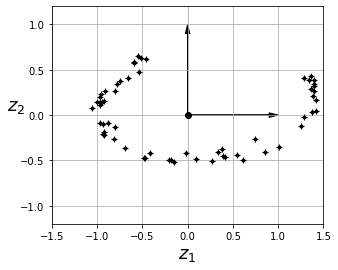

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.5, -1.2, 1.2])
ax.grid(True)

In [24]:
X2D_using_svd = X2D #單純只是把結果存成另一個變數

以上是手刻PCA，以下我們直接call scikit-learn套件做PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2) #主觀設定取2個主成分
X2D = pca.fit_transform(X) #因為這邊會把原先的X2D蓋掉，所以剛剛先另外存成X2D_using_svd

檢查跟剛剛手刻的結果一不一樣

In [27]:
np.allclose(X2D, X2D_using_svd)

True

有的時候我們在做PCA的時候會發現，主成分的基底方向可能會是反向的，所以上述的檢查np.allclose有時候要用<br>
np.allclose(X2D, -X2D_using_svd)

接著我們看scikit-learn取出的主成分跟手刻程式的主成分

In [28]:
pca.components_

array([[-0.95250178, -0.24902446, -0.17529172],
       [ 0.29267159, -0.9076305 , -0.30091563]])

In [29]:
Vt[:2]

array([[-0.95250178, -0.24902446, -0.17529172],
       [ 0.29267159, -0.9076305 , -0.30091563]])

接著我們看scikit-learn取出的主成分解釋變異

In [30]:
pca.explained_variance_ratio_

array([0.85406025, 0.13622918])

第一個主成分解釋了 84.2% 總變異, 第二個主成分解釋了 14.6% 總變異.

In [31]:
1 - pca.explained_variance_ratio_.sum()

0.009710567616013521

換句話說，我們把原先3D的資料投影到2D上，損失了0.9%的資訊

# Scikit-Learn PCA程式參數講解

PCA的函式的最主要參數：

n_components: 決定留下多少主成分，預設是None，如果用預設值「會保留$min(m,n)$維度的資料」<br>


In [32]:
pca_2 = PCA()

PCA函式可以進行的操作：

1. .fit(data): 把data套用PCA方法

In [33]:
pca_2.fit(X)

PCA()

In [34]:
pca_2.get_covariance()

array([[0.77610494, 0.16444637, 0.12810398],
       [0.16444637, 0.1640794 , 0.07046018],
       [0.12810398, 0.07046018, 0.04648324]])

In [35]:
pca_2.components_

array([[-0.95250178, -0.24902446, -0.17529172],
       [ 0.29267159, -0.9076305 , -0.30091563],
       [-0.08416476, -0.33792558,  0.93740205]])

In [36]:
pca_2.explained_variance_

array([0.84267356, 0.13441291, 0.0095811 ])

In [37]:
pca_2.fit_transform(X) - X

array([[-1.3940214 , -1.02096394, -0.31280421],
       [ 2.47273518,  0.84534347,  0.26534175],
       [ 1.9164259 , -0.5782469 , -0.01215047],
       [ 0.53690968, -1.02592435, -0.18171292],
       [-2.01941795,  0.08689079, -0.16916362],
       [-1.79791117,  0.10784135, -0.15050535],
       [-1.43026908,  0.90361857,  0.00848266],
       [ 2.55310948,  0.46526503,  0.20689432],
       [ 0.77013205, -0.9700169 , -0.15637357],
       [ 1.62530896, -0.73845605, -0.05899149],
       [-1.23804997,  0.90366987,  0.02162415],
       [ 2.23525143,  0.95582679,  0.26770239],
       [ 2.51611885,  0.23217835,  0.16515597],
       [-2.07122506, -0.16822512, -0.21562015],
       [-2.1004175 , -0.15775045, -0.21585254],
       [-2.21346461, -0.20957735, -0.23229478],
       [-1.9005189 , -0.82587621, -0.31459063],
       [-0.07426589, -1.01402729, -0.22146849],
       [-0.94977634, -1.23890413, -0.31911539],
       [-1.84374222, -0.55116817, -0.26449868],
       [ 0.73126784, -0.96262372, -0.157

# 更好的做法

In [38]:
pca_3 = PCA(n_components = 0.9) #給定要保留至少90%變異

In [39]:
X_reduced = pca.fit_transform(X)

In [40]:
pca.fit_transform(X) - X_reduced

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.